In [26]:
#python packages
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt


#custom modules
from oscillations import sister_states, oscillations




# Simulation of kinetochore oscillations

In [3]:
# Parameters
v = [-0.05, 0.01] #v-, v+
L = 0.8
k = 0.025
alpha = 0.01
tau = 100000
T = 2000000
s2 = np.sqrt(1./tau)
p = [0.95, 0.6]#p_c & p_ic
dt = 2
sigma = [-1, -1]

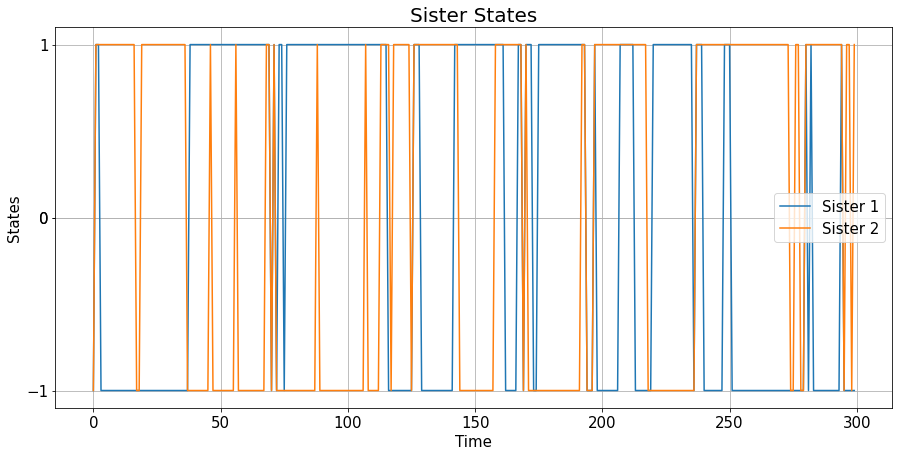

In [5]:
# Step 1: State simulation

states = sister_states(p,sigma,T=T,dt=2)

# Plotting
plt.figure(figsize=(15,7))
plt.title('Sister States', fontsize=20)
plt.xticks(fontsize=15);plt.yticks([-1,.0,0.0,1.0],fontsize=15)
plt.xlabel('Time', fontsize=15);plt.ylabel('States',fontsize=15)
plt.plot(states[:300,0],label='Sister 1')
plt.plot(states[:300,1],label='Sister 2')
plt.legend(fontsize=15)
plt.grid('on')
#plt.savefig('./Plots/ss.png')
plt.show()


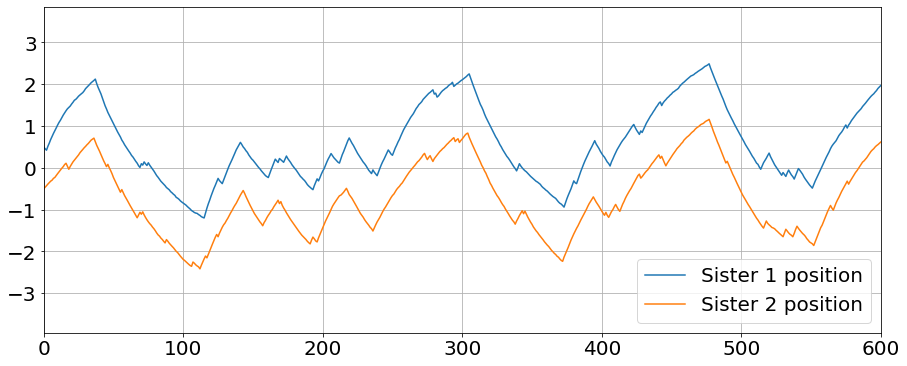

In [28]:
#Step 2: Kinetochore oscillations

KO = oscillations(states,v,dt,s=s2)


#Plotting
plt.figure(figsize=(15,6))
plt.grid('on')
plt.xticks(fontsize='20');plt.yticks(fontsize='20')
plt.xlim(0,600)
plt.plot(KO[:,0],label='Sister 1 position')
plt.plot(KO[:,1],label='Sister 2 position')
# plt.plot(Z[:,2])
plt.legend(fontsize=20)
plt.savefig('../../Plots/new_oscillations.png')
plt.show()

# Analysis

In [29]:
# Simulation as T increases

states = sister_states(p,sigma,T=2e6,dt=2)
KO = oscillations(states,v,dt,s=s2)

In [30]:
# 0 = -+ state
# 1 = -- state
# 2 = +- state
# 3 = ++ state
# KO[0] = sister 1 position in time
# KO[1] = sister 2 position in time
# KO[2] = inter-sister distance
# Ko[3] = hidden states
# KO[4] = mean sister position


#Extracting the positions based on the hidden states

#Inter-sister distance
distance_mp = KO[KO[:,3]==0][:,2]
distance_mm = KO[KO[:,3]==1][:,2]
distance_pm = KO[KO[:,3]==2][:,2]
distance_pp = KO[KO[:,3]==3][:,2]
distance_cc = np.hstack((distance_mp,distance_pm)) # inter-sister distance in the coherence state


#Mean position
mean_mp = KO[KO[:,3]==0][:,4]
mean_mm = KO[KO[:,3]==1][:,4]
mean_pm = KO[KO[:,3]==2][:,4]
mean_pp = KO[KO[:,3]==3][:,4]

In [31]:
# Extract the duration in each states into different frames

hidden_states = KO[:,3]
distance = KO[:,2] #inter-sister distance
mean = KO[:,4] #mean sister position

i = 0
frame = [] 
pos = []
mean_pos = []

Frames = []
Pos_frames = []
Mean_frames = []

#collect the initial states, distance and mean positions
frame.append(hidden_states[i])
pos.append(distance[i])
mean_pos.append(mean[i])

# loop through the hidden_states vector to examine duration of the kinetochore in each hidden states and extract
# the distance and mean positions while in the hidden states

for s in hidden_states[1:]:
    #print(s)
    #first check if the last element is the same
    # if true continue saving in the current frame, otherwise save the frame and create a new frame
    if frame[-1] == s:
        frame.append(s)
        pos.append(distance[i])
        mean_pos.append(mean[i])

    else:
        #append all existing data
        Frames.append(frame) 
        Pos_frames.append(pos)
        Mean_frames.append(mean_pos)
        
        #start a new frame
        frame = [] 
        pos = []
        mean_pos = []
        
        #save data
        frame.append(s) 
        pos.append(distance[i])
        mean_pos.append(mean[i])
    i +=1

In [32]:
distance = KO[:,2] #inter-sister distance
mean = KO[:,4] #mean sister position



In [15]:
Frames #each element(frame) represent the duration of the sisters in each state

[[1.0, 1.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [3.0],
 [1.0, 1.0],
 [0.0, 0.0, 0.0],
 [3.0],
 [0.0, 0.0],
 [1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0],
 [2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0],
 [3.0],
 [0.0, 0.0, 0.0],
 [3.0, 3.0],
 [0.0, 0.0, 0.0],
 [3.0],
 [2.0, 2.0],
 [1.0],
 [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 [1.0, 1.0],
 [0.0, 0.0, 0.0],
 [3.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [3.0, 3.0, 3.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0],
 [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 [1.0],
 [2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0],
 [3.0, 3.0, 3.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [3.0, 3.0, 3.0],
 [0.0, 0.0]

In [33]:
init = [frame[0] for frame in Frames] #marks the entry point into each frame
pm_idx = [i for i in range(len(init)) if init[i]==2.0] # +- state


# Extract the +- frames for the mean position
Frame_mean_pm = [Mean_frames[i] for i in pm_idx]

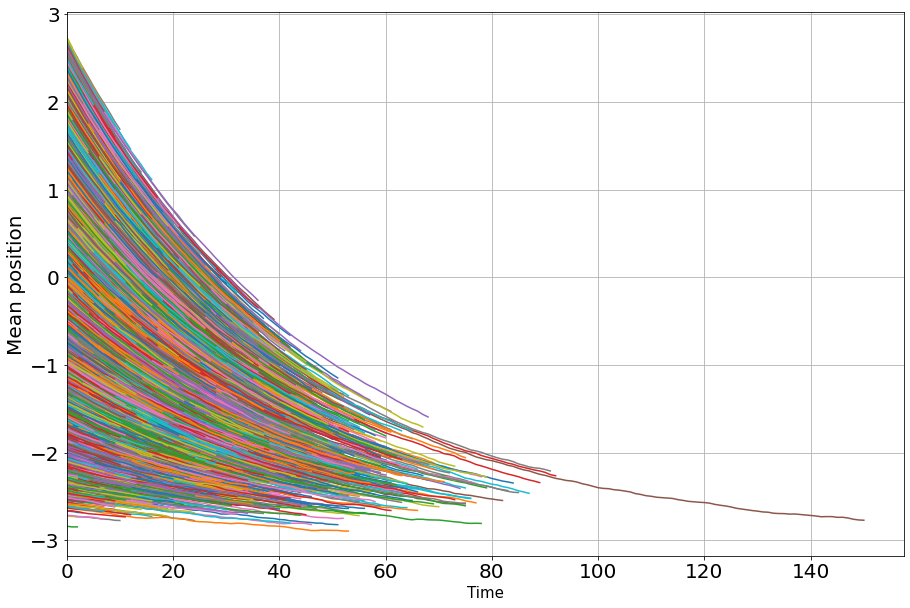

In [42]:
# Mean position

plt.figure(figsize=(15,10))
for val in Frame_mean_pm:
    #selected trajectories at time stepping = 20. No reason for this, just for convenience and 
    #better visualization of the trajectories.
    plt.plot(val)

plt.xlim(0)
plt.xlabel('Time', fontsize=15);plt.ylabel('Mean position', fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
# plt.title('Mean sister position for $\sigma = (+,-)$', fontsize=20)
plt.grid('on')
plt.savefig('../../Plots/mean_pos_pm.png')
plt.show()

In [16]:
def bin_trajectory(Frame,start,stop):
    
    sub_bins = []
    Bins = []
    
    for frame in Frame:
        sub_bins.append(frame[start:stop])
    
    for b in sub_bins:
        for val in b:
            Bins.append(val)

    return Bins

  


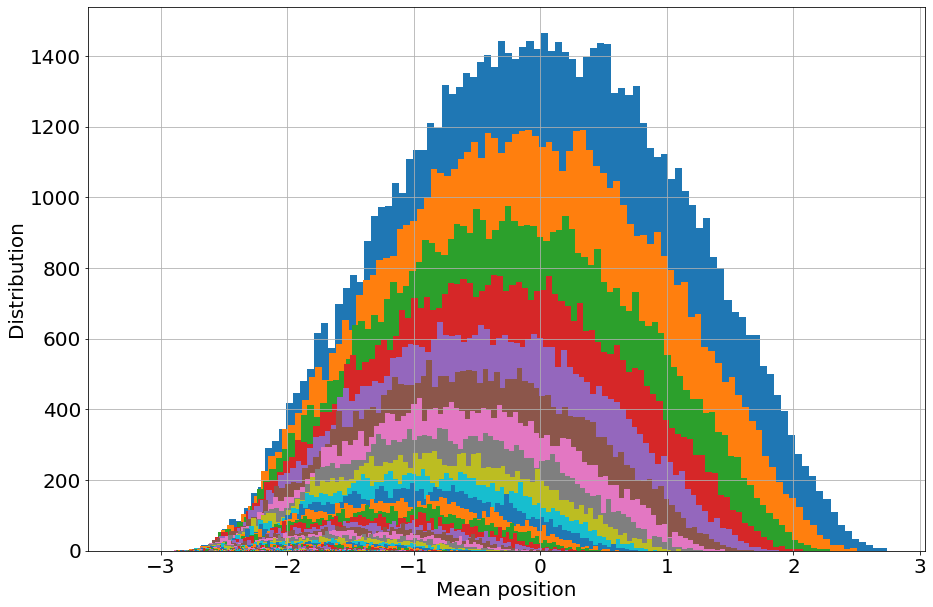

In [41]:
maxLength = max(len(x) for x in Frames) #get the length of the longest traj
step = 2
Bins = []
for i in np.arange(0,maxLength,step):
    Bins.append(bin_trajectory(Frame_mean_pm,i,i+step))


plt.figure(figsize=(15,10))

bins = 100
Pt = np.zeros((len(Bins),bins)) #time x space
for i in range(0,len(Bins)):
    Pt[i,:] = plt.hist(Bins[i],bins=bins)[0]
np.save('../Data/mean_position_pm.npy',Pt)    
plt.xlabel('Mean position',fontsize=20);plt.ylabel('Distribution',fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
#plt.title(r'Binned histogram for $\bar{X}$', fontsize=20)
plt.grid('on')
plt.savefig('../../Plots/mean_position_pm.png')
plt.show()

In [26]:
Pt.shape

(61, 100)

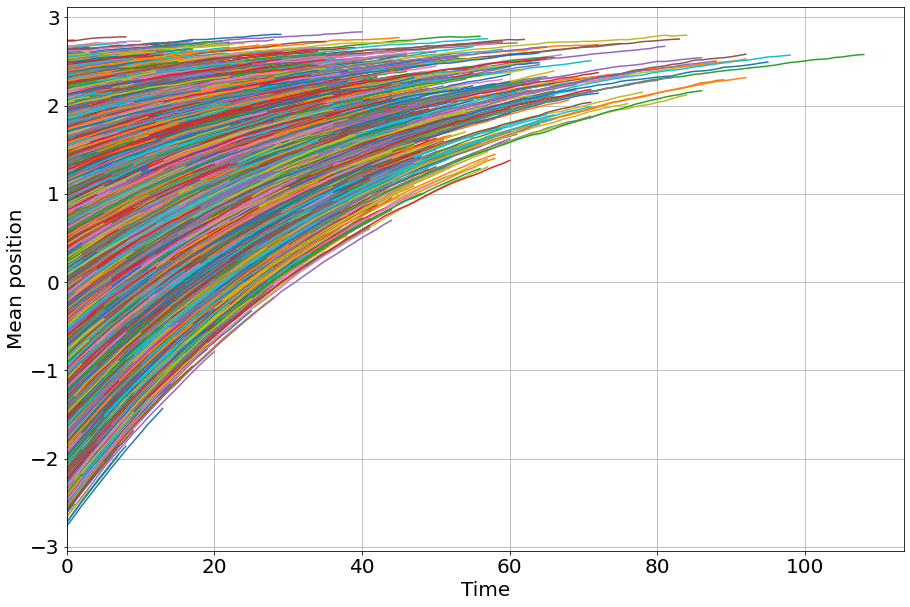

In [43]:
init = [frame[0] for frame in Frames] #marks the entry point into each frame
mp_idx = [i for i in range(len(init)) if init[i]==0.0] # -+ state


# Extract the +- frames for the mean position
Frame_mean_mp = [Mean_frames[i] for i in mp_idx]

# Mean position

plt.figure(figsize=(15,10))
for val in Frame_mean_mp:
    #selected trajectories at time stepping = 20. No reason for this, just for convenience and 
    #better visualization of the trajectories.
    plt.plot(val)

plt.xlim(0)
plt.xlabel('Time', fontsize=20);plt.ylabel('Mean position', fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
#plt.title('Mean sister position for $\sigma = (-,+)$', fontsize=20)
plt.grid('on')
plt.savefig('../../Plots/mean_pos_mp.png')
plt.show()

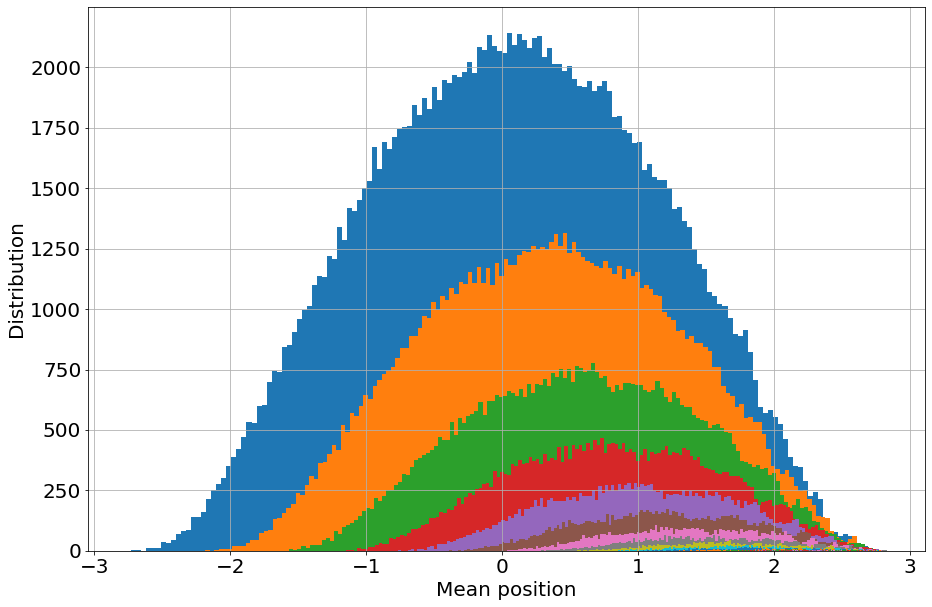

In [39]:
maxLength = max(len(x) for x in Frames) #get the length of the longest traj

step = 5
Bins = []
for i in np.arange(0,maxLength,step):
    Bins.append(bin_trajectory(Frame_mean_mp,i,i+step))
    
plt.figure(figsize=(15,10))

bins = 150
Pt = np.zeros((len(Bins),bins)) #time x space
for i in range(0,len(Bins)):
    Pt[i,:] = plt.hist(Bins[i],bins=bins)[0]
np.save('../Data/mean_position_mp.npy',Pt)    
    
plt.xlabel('Mean position',fontsize=20);plt.ylabel('Distribution',fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
#plt.title(r'Binned histogram for $\bar{X}$', fontsize=20)
plt.grid('on')
plt.savefig('../../Plots/mean_position_mp.png')
plt.show()

# End of submitted report. The next section is for future work

In [22]:
import pandas as pd

In [21]:
A = [[2,3,4],
    [2,3,4]]

In [25]:
pd.DataFrame(A,index=[1,2],columns=['f','s','t'])

,f,s,t
1,2,3,4
2,2,3,4


# Inter-sister distance

In [9]:
init = [frame[0] for frame in Frames] #marks the entry point into each frame

coh_idx = [i for i in range(len(init)) if init[i]==2.0 or init[i]==0.0] # +-/-+ state


# Extract the +- frames for the inter-sister distance
Frame_distance_pm = [Pos_frames[i] for i in coh_idx]

In [10]:
def bin_inter_sister_trajectory(Frame,start,stop):
    
    sub_bins = []
    Bins = []
    
    for frame in Frame:
        sub_bins.append(frame[start:stop])
    
    for b in sub_bins:
        for val in b:
            if val <= 1.3:
                Bins.append(val)
    return Bins

In [12]:
maxLength = max(len(x) for x in Frames) #get the length of the longest traj
step = 5
Bins = []
for i in np.arange(0,maxLength,step):
    Bins.append(bin_inter_sister_trajectory(Frame_distance_pm,i,i+step))
    


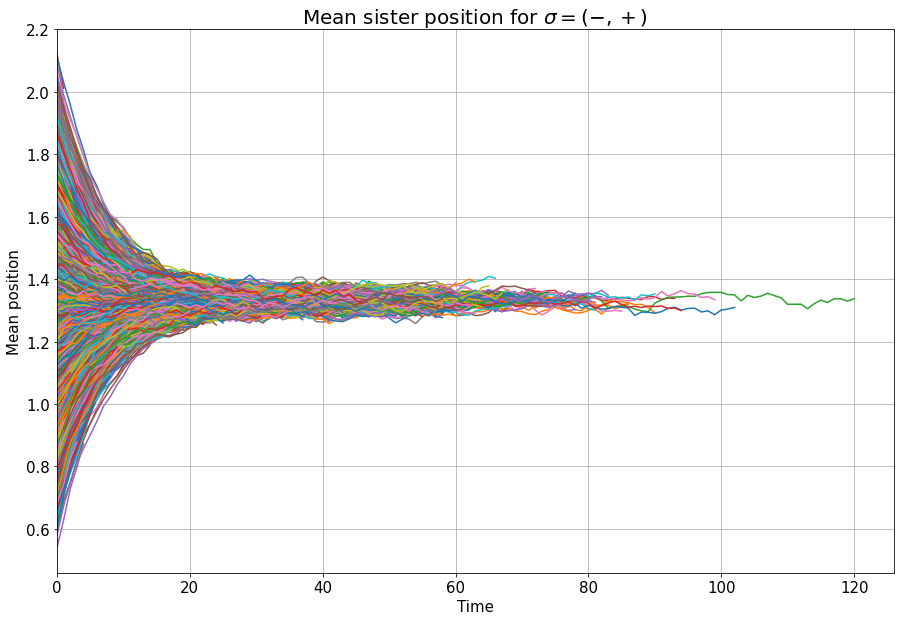

In [13]:
plt.figure(figsize=(15,10))
for val in Frame_distance_pm:
    #selected trajectories at time stepping = 20. No reason for this, just for convenience and 
    #better visualization of the trajectories.
    plt.plot(val)

plt.xlim(0)
plt.xlabel('Time', fontsize=15);plt.ylabel('Mean position', fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.title('Mean sister position for $\sigma = (-,+)$', fontsize=20)
plt.grid('on')
#plt.savefig('../Plots/mean_pos_frames.png')
plt.show()

In [80]:
# # bin_inter_sister_trajectory
# def bin_inter_sister_trajectory(Frame,start,stop):
    
#     sub_bins = []
#     Bins = []
    
#     for frame in Frame:
#         sub_bins.append(frame[start:stop])
    
#     for b in sub_bins:
#         for val in b:
#             if val <= 1.3:
#                 Bins.append(val)
#     return Bins

# maxLength = max(len(x) for x in Frames) #get the length of the longest traj
# step = 5
# Bins = []
# for i in np.arange(0,maxLength,step):
#     Bins.append(bin_inter_sister_trajectory(Frame_distance_pm,i,i+step))

    
# plt.figure(figsize=(15,10))

# bins = 150
# Pt = np.zeros((len(Bins),bins)) #time x space
# for i in range(0,len(Bins)):
#     Pt[i,:] = plt.hist(Bins[i],bins=bins)[0]
    
# plt.xlabel('$\Delta X$',fontsize=15);plt.ylabel('Distribution',fontsize=15)
# plt.xticks(fontsize=15);plt.yticks(fontsize=15)
# plt.title(r'Binned histogram for $\Delta X$', fontsize=20)
# plt.grid('on')
# plt.show()

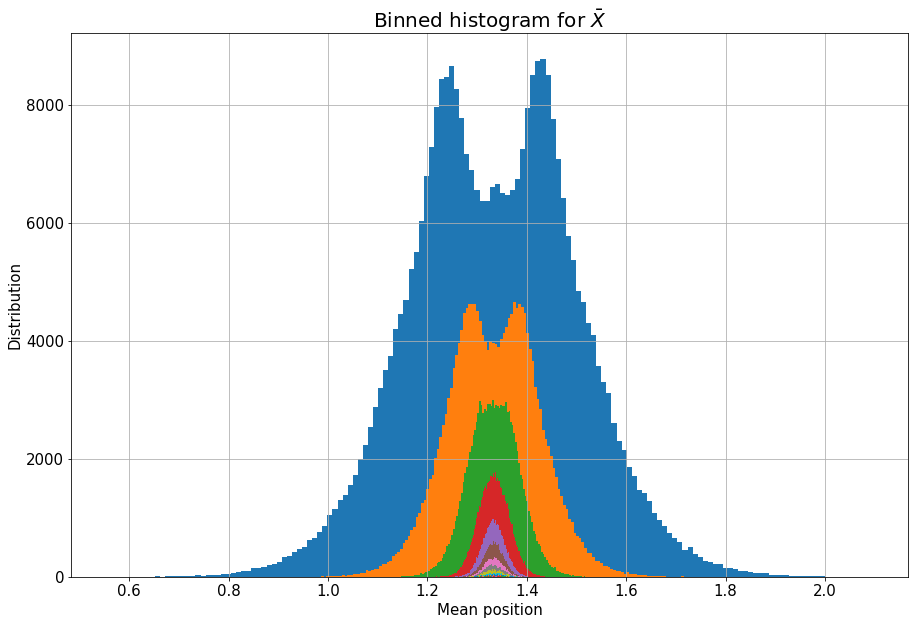

In [292]:
step = 5
Bins = []
for i in np.arange(0,maxLength,step):
    Bins.append(bin_trajectory(Frame_distance_pm,i,i+step))
    
plt.figure(figsize=(15,10))

bins = 150
Pt = np.zeros((len(Bins),bins)) #time x space
for i in range(0,len(Bins)):
    Pt[i,:] = plt.hist(Bins[i],bins=bins)[0]
    
plt.xlabel('$\Delta X$',fontsize=15);plt.ylabel('Distribution',fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.title(r'Binned histogram for $\Delta X$', fontsize=20)
plt.grid('on')
plt.show()

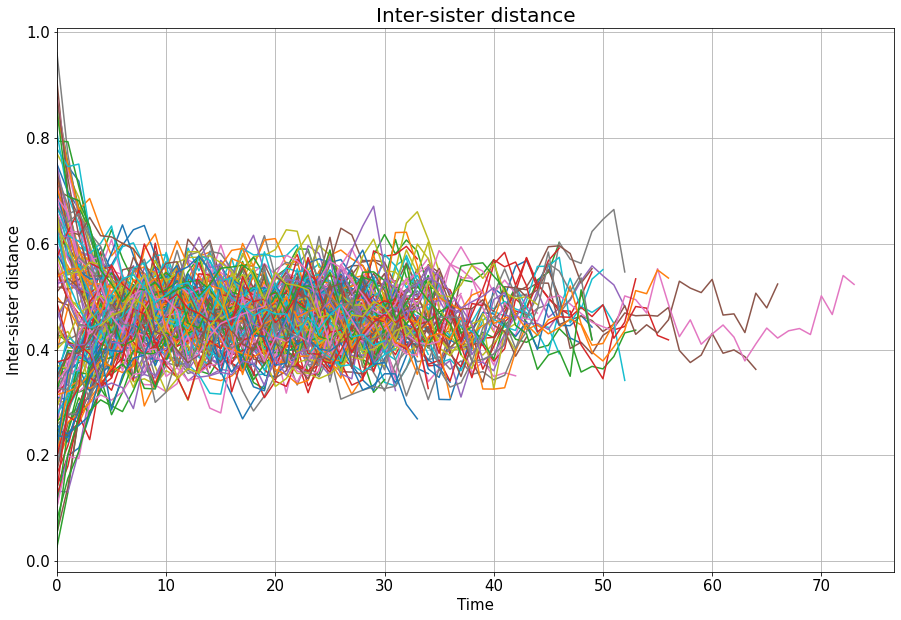

In [77]:
# Examine the frames for time > 30

Inter_sister30 = []
for frame in Pos_frames:
    if len(frame) >= 30:
        Inter_sister30.append(frame)
        
#Plotting
plt.figure(figsize=(15,10))

for val in Inter_sister30[0::20]:
    #selected trajectories at time stepping = 20. No reason for this, just for convenience and 
    #better visualization of the trajectories.
    plt.plot(val)

plt.xlim(0)
plt.xlabel('Time', fontsize=15);plt.ylabel('Inter-sister distance', fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.title('Inter-sister distance', fontsize=20)
plt.grid('on')
plt.savefig('../Plots/inter_sister_dist_frame.png')
plt.show()

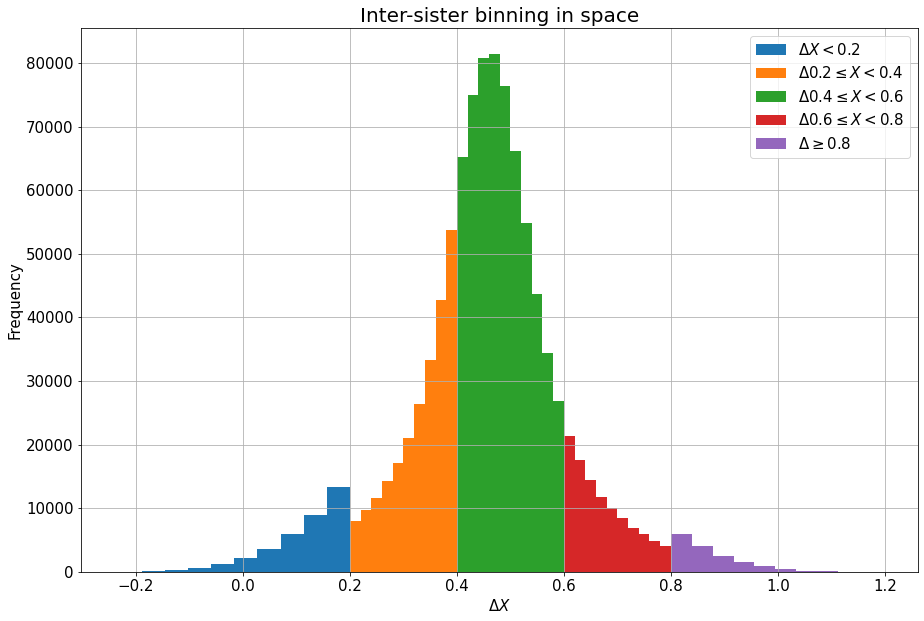

In [71]:

Q1 = []
Q2 = []
Q3 = []
Q4 = []
Q5 = []
for frame in Pos_frames:
    for val in frame:
        if val < 0.2:
            Q1.append(val)
        elif val >= 0.2 and val < 0.4:
            Q2.append(val)
        elif val >= 0.4 and val < 0.6:
            Q3.append(val)
        elif val >= 0.6 and val < 0.8:
            Q4.append(val)
        else:
            Q5.append(val)
            
plt.figure(figsize=(15,10))

plt.hist(Q1,label='$\Delta X < 0.2$')
plt.hist(Q2,label='$\Delta 0.2 \leq X < 0.4$')
plt.hist(Q3,label='$\Delta 0.4 \leq X < 0.6$')
plt.hist(Q4,label='$\Delta 0.6 \leq X < 0.8$')
plt.hist(Q5,label='$\Delta \geq 0.8$')

plt.title('Inter-sister binning in space',fontsize=20)
plt.xlabel('$\Delta X$',fontsize=15);plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.grid('on')
plt.legend(fontsize=15)
plt.savefig('../Plots/inter_sister_spatial_bins.png')
plt.show()

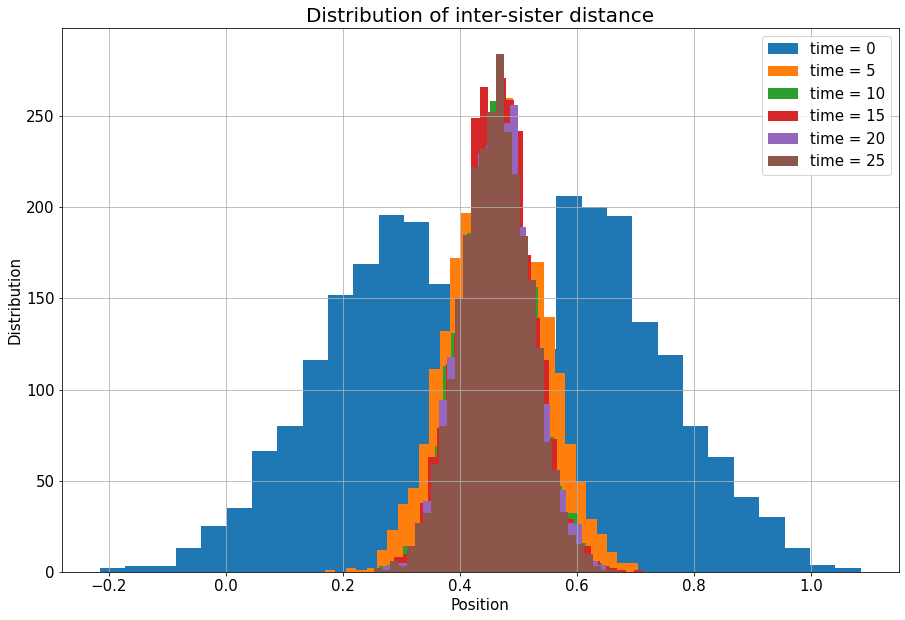

In [76]:
# Compute the distribution in the frames at different time snapshots

time = np.arange(0,30,5)

plt.figure(figsize=(15,10))
for t in time:
    time_snapshot = [inter_sis_dist[t] for inter_sis_dist in Inter_sister30]
    plt.hist(time_snapshot,bins=30,label='time = '+str(t))

plt.xlabel('Position', fontsize=15);plt.ylabel('Distribution', fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('Distribution of inter-sister distance', fontsize=20)
plt.grid('on')
plt.savefig('../Plots/inter_sister_time_snapshots.png')
plt.show()